In [3]:
# importing all libraries
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator
from IPython import display

IMG_SIZE = 150

In [4]:
# Loading datasets
# dataset already saved on system instead of downloading directly
# path of the dataset
PATH = r'C:\Users\ferna\OneDrive\Documents\Datasets\cats_and_dogs'

# directories of datasets for testing, training and validation
test_dir = os.path.join(PATH, 'test')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Rescaling images
test_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)



# Creating training set
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 batch_size=32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (150, 150),
                                            batch_size=32,
                                            class_mode = 'binary')

# Creating the validation set
validation_set = validation_datagen.flow_from_directory(validation_dir,
                                            target_size = (150, 150),
                                            batch_size=32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
Found 1000 images belonging to 2 classes.


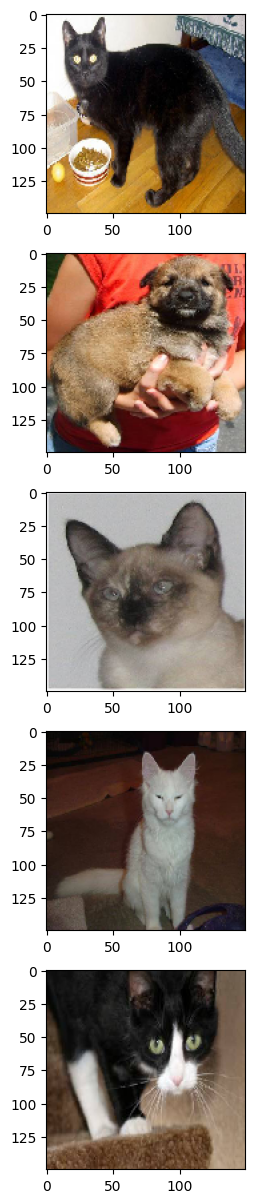

In [6]:
# print 5 random images from training set
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
   
    plt.show()

sample_training_images, _ = next(training_set)
plotImages(sample_training_images[:5])

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


c:\Users\ferna\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


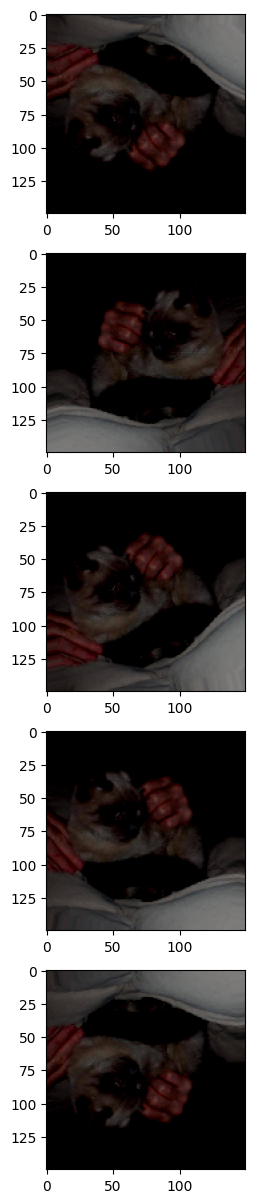

In [7]:
# adding transformations to images
train_image_generator = ImageDataGenerator(
    samplewise_center=True,
    featurewise_center=True,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    rescale=1./255)

# Show a random image that has different transformations applied to it
train_datagen = train_image_generator.flow_from_directory(batch_size=16,
                                                     directory=train_dir,
                                                     target_size=(150, 150),
                                                     class_mode='binary')

test_image_generator = ImageDataGenerator(
    samplewise_center=True,
    featurewise_center=True,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    rescale=1./255)

test_imagegen = test_image_generator.flow_from_directory(batch_size=64,
                                                     directory=train_dir,
                                                     target_size=(150, 150),
                                                     class_mode='binary')


transformed_images = [train_datagen[0][0][0] for i in range(5)]

plotImages(transformed_images)

In [8]:
# Creating the model
model = Sequential()

# add convolutional and pooling layers (max pooling, average pooling)
model.add(Convolution2D(256,3,3,input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Convolution2D(128,3,3,activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

# flattening
model.add(Flatten())

# Add dense layers (Neural Network)
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [17]:
# training the model
history = model.fit(training_set, epochs=50, validation_data=validation_set)
test_loss, test_acc = model.evaluate(validation_set)
print('Training accuracy: ', test_acc)

Epoch 1/50
63/63 [==============================] - 7s 107ms/step - loss: 0.1676 - accuracy: 0.9320 - val_loss: 0.9204 - val_accuracy: 0.7010
Epoch 2/50
63/63 [==============================] - 7s 107ms/step - loss: 0.1226 - accuracy: 0.9505 - val_loss: 1.0463 - val_accuracy: 0.7150
Epoch 3/50
63/63 [==============================] - 7s 108ms/step - loss: 0.1016 - accuracy: 0.9600 - val_loss: 1.3837 - val_accuracy: 0.6720
Epoch 4/50
63/63 [==============================] - 7s 107ms/step - loss: 0.1164 - accuracy: 0.9600 - val_loss: 1.2107 - val_accuracy: 0.6930
Epoch 5/50
63/63 [==============================] - 7s 107ms/step - loss: 0.1347 - accuracy: 0.9520 - val_loss: 1.2844 - val_accuracy: 0.6960
Epoch 6/50
63/63 [==============================] - 7s 107ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 1.4933 - val_accuracy: 0.6960
Epoch 7/50
63/63 [==============================] - 7s 107ms/step - loss: 0.0620 - accuracy: 0.9770 - val_loss: 1.5245 - val_accuracy: 0.7100
Epoch 

In [19]:
#to predict new images 
def predict_image(imagepath, model):
    prediction = model.predict(test_set)   
    if prediction[0][0] >= .5:
        result = 'dog'
        probability = prediction[0][0]
        print(result)
        print('Probability: ' + str(probability))

    else:
        result = 'cat'
        probability = 1 - prediction[0][0]
        print(result)
        print('Probability: ' + str(probability))
        


### Evaluating the model
The following cells call the predict_image function passing the path to an image and the model to give a prediction. The result is the prediction, the probability that the model is certain of the prediction and the image.

2/2 [==============================] - 0s 25ms/step
cat
Probability: 0.999999999985997


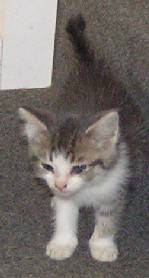

In [20]:
predict_image(r'C:\Users\ferna\OneDrive\Documents\Datasets\cats_and_dogs\test\test\35.jpg', model)
display.Image(r'C:\Users\ferna\OneDrive\Documents\Datasets\cats_and_dogs\test\test\35.jpg')

2/2 [==============================] - 0s 24ms/step
dog
Probability: 1.0


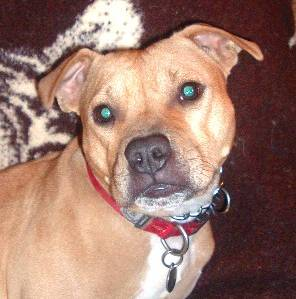

In [24]:
predict_image(r'C:\Users\ferna\OneDrive\Documents\Datasets\cats_and_dogs\test\test\2.jpg', model)
display.Image(r'C:\Users\ferna\OneDrive\Documents\Datasets\cats_and_dogs\test\test\2.jpg')
